# Cleaning the Dataset
This jupyter notebook is about cleaning the dataset of the competition. 

## Dataset Structure:

- **Categorical Data:**
  - **compset_group:** Represents different categories or groups of brands. There are 20 unique categories in this column.
  - **compset:** Indicates specific brand sets within each category. There are 54 unique values in this column.
  - **business_entity_doing_business_as_name:** Names of the businesses or brands. There are 706 unique names in this column.
  - **legal_entity_name:** Legal names of the entities or brands. There are 423 unique names.
  - **domicile_country_name:** Countries where the businesses are based. There are 26 unique countries.
  - **ultimate_parent_legal_entity_name:** Names of the ultimate parent companies. There are 401 unique names.
  - **primary_exchange_name:** Names of the primary stock exchanges where the companies are listed. There are 30 unique exchanges.
  - **calculation_type:** This column is redundant and can be dropped as it only contains one value.
  - **period:** Represents the period, but it's redundant and can be dropped.
  - **period_end_date:** Dates marking the end of each period. There are 455 unique dates.
  
Now, keeping this structure in mind, we can proceed with data cleaning, exploration, and further analysis as needed to address the specific objectives and requirements of the project. Let me know if you need further assistance with any specific aspect of the analysis!

## Potential Cleaning Steps: 

1. Handling Redundant Columns:
   - Drop the `period` and `calculation_type` columns from the dataset.

2. Dealing with Missing Values:
   - Check for missing values:
     ```python
     missing_values = df.isnull().sum()
     ```
   - Decide on the appropriate strategy based on the amount of missing data:
      * Imputation
      * Deletion of rows or columns
      * Mean or median substitution
3. Addressing inconsistent or Erroneous Values:
   - Check for any inconsistent or erroneous values in the dataset.
   - Correct or remove such values as needed.
   - Review the unique values in each column to identify any anomalies. (Ensure consistency in naming conventions, formats, etc.)
   - Standardize the labels or correcting errors in the data
4. Datatype Conversion:
   - Convert columns to appropriate data types (e.g., dates to datetime objects, numerical values to integers or floats, etc.)
5. Handling Outliers:
   - Identify and address any outliers in the dataset.
   - Decide on the appropriate strategy for handling outliers (e.g., removing, transforming, or keeping them).
   - For numerical features, detect outliers using methods such as Interquartile Range (IQR) or Z-score.
   - Visualize the distribution of numerical values using boxplots, histograms, or scatterplots to spot outliers.
   - Decide whether to remove outliers or handle them through transformations or imputation methods.

6. Addressing Contaminated Data:
   - Check for any duplicate rows in the dataset.
   - Remove duplicate rows if necessary.
   - Address issues such as incorrect data types or spelling variations that may lead to duplicate entries.
7. Addressing Highly Correlated Features:
   - Calculate the correlation matrix to identify highly correlated features. (indicating redundancy)
   - Use Visualization or statistical methods to identify and address multicollinearity. (heatmaps, scatter plots, dendograms, etc.)
   - Decide which features to keep or remove based on the correlation analysis.
   - Decide which features to remove based on the strength of correlation and relevance to the analysis.


## Cleaning the Dataset (Categorial Data):

In [1]:
# Loading  the data
import pandas as pd
data_path = '../data/skylab_instagram_datathon_dataset.csv'
df = pd.read_csv(data_path, sep=';')

### Dealing with Missing Values
Let's start by checking for missing values in the dataset and deciding on the appropriate strategy to handle them.

In [2]:
def missing_values_percentile(df):
        # Total missing values
        mis_val = df.isnull().sum()
        
        # Percentage
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
    
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        return mis_val_table_ren_columns
    
missing_values_table = missing_values_percentile(df)
missing_values_table

Your selected dataframe has 15 columns.
There are 9 columns that have missing values.


,Missing Values,% of Total Values
domicile_country_name,245724,34.9
primary_exchange_name,245724,34.9
followers,125055,17.8
legal_entity_name,27755,3.9
ultimate_parent_legal_entity_name,27755,3.9
videos,19964,2.8
comments,8970,1.3
pictures,8510,1.2
likes,8336,1.2


Now we plot the Nullity Matrix to visualize the missing values in the dataset.

<AxesSubplot:>

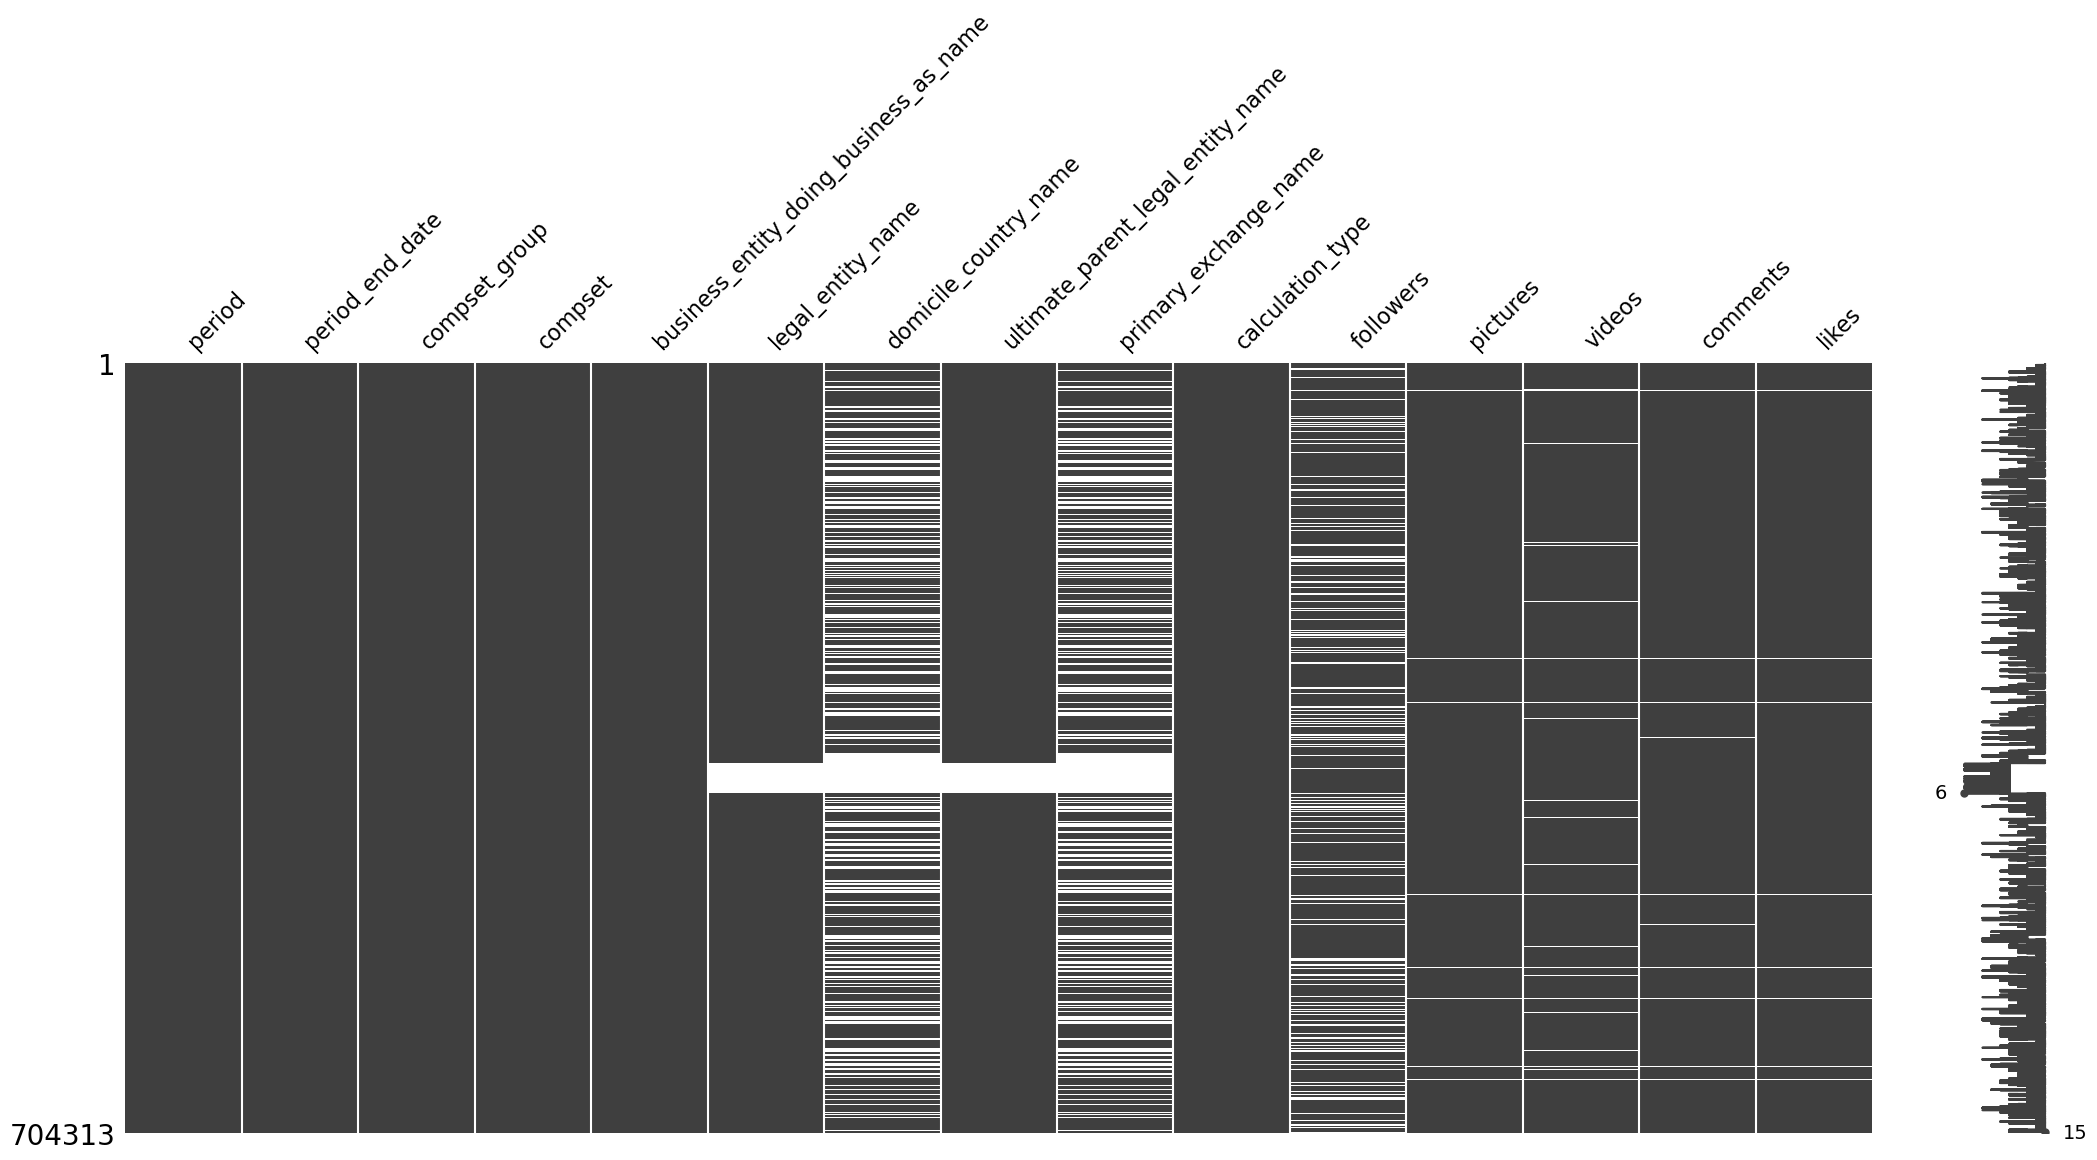

In [3]:
import missingno as msno
msno.matrix(df)

As we can see, the are alot of missing values for 'domicile_country_name' and 'primary_exchange_name'. We can decide to drop these columns if they are not relevant to the analysis.   

The alternative is to impute the missing values based on the available data, meaning that we can fill the missing values of a brand with a country name, if we know the brand has some other name in another row.   

The other thing is that the 'business_entity_doing_business_as_name' and 'legal_entity_name' columns have the same number of missing values. This means that the missing values in these columns are in the same rows. We can decide to drop these rows or impute the missing values.

In [4]:
# show a dataframe where the 'domicile_country_name' and the 'primary_exchange_name' is nan 
df[df['domicile_country_name'].isnull() & df['primary_exchange_name'].isnull()]

,period,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,calculation_type,followers,pictures,videos,comments,likes
6162,Weekly,2020-01-11,Apparel Retail,US Department Store,Saks Fifth Avenue,Saks Fifth Avenue,NaN,Hudson's Bay,NaN,Metric Value,2025049.0,247.0,54.0,1627.0,165375.0
6163,Weekly,2018-06-09,Apparel Retail,Apparel Retail,Saks Fifth Avenue,Saks Fifth Avenue,NaN,Hudson's Bay,NaN,Metric Value,1457630.0,299.0,28.0,2298.0,199999.0
6164,Weekly,2021-03-06,Apparel Retail,Apparel Retail,Saks Fifth Avenue,Saks Fifth Avenue,NaN,Hudson's Bay,NaN,Metric Value,2198181.0,223.0,25.0,7501.0,190903.0
6165,Weekly,2022-01-15,Apparel Retail,US Department Store,Saks Fifth Avenue,Saks Fifth Avenue,NaN,Hudson's Bay,NaN,Metric Value,2360819.0,240.0,32.0,1011.0,123415.0
6166,Weekly,2019-10-19,Apparel Retail,US Softlines Analyst Interest List,Saks Fifth Avenue,Saks Fifth Avenue,NaN,Hudson's Bay,NaN,Metric Value,1970233.0,196.0,100.0,1466.0,147564.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
704308,Weekly,2017-03-18,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,Metric Value,NaN,50.0,8.0,1271.0,14818.0
704309,Weekly,2018-10-27,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,Metric Value,163873.0,125.0,2.0,1764.0,34188.0
704310,Weekly,2023-08-05,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,Metric Value,319485.0,118.0,35.0,1697.0,6328.0
704311,Weekly,2019-11-02,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,Metric Value,228699.0,129.0,2.0,1972.0,29174.0


Interestingly, the 'domicile_country_name' and 'primary_exchange_name' columns have the same number of missing values. This could indicate that the missing values are related to the same brands.

In [5]:
# Get unique values for 'domicile_country_name' for each 'business_entity_doing_business_as_name'
unique_countries_by_brand = df.groupby('business_entity_doing_business_as_name')['domicile_country_name'].apply(lambda x: x.unique())

# Check if any brand has NaN as one of its country names
brands_with_nan_country = {}
for brand, countries in unique_countries_by_brand.items():
    if pd.isnull(countries).any():
        brands_with_nan_country[brand] = countries

# Print brands with NaN in their country names and their entire country names
print("Brands with NaN in their country names:")
for brand, countries in brands_with_nan_country.items():
    print(f"{brand}: {countries}")


Brands with NaN in their country names:
3.1 Phillip Lim: [nan]
About You: [nan]
Acne Studios: [nan]
Aeropostale: [nan]
Aldi: [nan]
Aldo: [nan]
Alexander Wang: [nan]
Alice & Olivia: [nan]
All Brands: [nan]
AllSaints: [nan]
Almond Breeze: [nan]
Alo Yoga: [nan]
Amaro: [nan]
Anastasia Beverly Hills: [nan]
Anthropologie: [nan]
Applebee's: [nan]
Armani: [nan]
Audemars Piguet: [nan]
Avon: [nan]
Balmain: [nan]
Balmain Beauty: [nan]
Bang: [nan]
Barilla: [nan]
Barneys New York: [nan]
Barry's Bootcamp: [nan]
Bass Pro Shops: [nan]
Bell & Ross: [nan]
Belotero: [nan]
Bergdorf Goodman: [nan]
Bertolli: [nan]
Billabong: [nan]
Bjorg: [nan]
Blaze Pizza: [nan]
Blink Fitness: [nan]
Bloomingdale's: [nan]
Bobstore: [nan]
BodyArmor: [nan]
Botox: [nan]
Breitling: [nan]
Brooks Brothers: [nan]
Buffalo Wild Wings: [nan]
C&A: [nan]
Cabela's: [nan]
Califia Farms: [nan]
Cannuka: [nan]
Capodarte: [nan]
Carla Amorim: [nan]
Carmen Steffens: [nan]
Carolina Herrera: [nan]
Casper: [nan]
Chanel: [nan]
Chanel Beauty: [nan]


There are some brands that have ';' as their 'domicile_country_name' and 'primary_exchange_name'. We can decide to drop these rows or impute the missing values based on the available data.   

In [6]:
# Get unique values for 'domicile_country_name' for each 'business_entity_doing_business_as_name'
unique_countries_by_brand = df.groupby('business_entity_doing_business_as_name')['domicile_country_name'].apply(lambda x: x.unique())

# Check if any brand has NaN as one of its country names
brands_with_sq_country = {}
for brand, countries in unique_countries_by_brand.items():
    if ';' in countries:
        brands_with_sq_country[brand] = countries

# Print brands with NaN in their country names and their entire country names
print("Brands with ';' in their country names:")
for brand, countries in brands_with_sq_country.items():
    print(f"{brand}: {countries}")


Brands with ';' in their country names:
Ivy Park: [';']


There is only one brand with the name 'Ivy Park' that has ';' as their country name.

The brands with missing country names, don't have any other unique country names in their respective unique country values. The best aproach is to replace the NaN values with **'Unknown'** for both columns.   

For the ';' values, we can replace them with **'Unknown'** as well.

### Handling Redundant Columns:

In [7]:
# Drop the `period` and `calculation_type` columns from the dataset. 
df.drop(['period', 'calculation_type'], axis=1, inplace=True)
df

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
0,2019-12-07,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,22066189.0,97.0,13.0,16239.0,6112205.0
1,2021-01-30,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,24289963.0,54.0,2.0,13358.0,3189144.0
2,2016-05-14,Luxury & Premium & Mainstream,Soft Luxury,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,7137442.0,42.0,8.0,15894.0,2152955.0
3,2019-04-20,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,18901125.0,73.0,9.0,26762.0,5224916.0
4,2023-03-25,Luxury & Premium & Mainstream,US Softlines Analyst Interest List,Versace,Capri Holdings,United States of America,Capri Holdings,New York Stock Exchange,30251374.0,54.0,10.0,25681.0,5760987.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
704308,2017-03-18,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,NaN,50.0,8.0,1271.0,14818.0
704309,2018-10-27,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,163873.0,125.0,2.0,1764.0,34188.0
704310,2023-08-05,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,319485.0,118.0,35.0,1697.0,6328.0
704311,2019-11-02,Outdoor Gear,Outdoor Gear,Klean Kanteen,Klean Kanteen Inc,NaN,Klean Kanteen Inc,NaN,228699.0,129.0,2.0,1972.0,29174.0


### Dealing with Data Contaminations


In [8]:
from fuzzywuzzy import fuzz

def check_compset_column(df, column):
    """
    Check for potential data contamination or inconsistencies in the categorical columns.
    
    Parameters:
    - df (DataFrame): The DataFrame containing the dataset.
    - column (str): The name of the column to check.
    
    Returns:
    - unique_values (list): A list of unique values in the column.
    - potential_duplicates (dict): Dictionary containing potential duplicate pairs and their similarity scores.
    """

    # Check unique values in the specified column
    unique_values = df[column].unique()
    
    # Check for potential duplicate columns
    potential_duplicates = {}
    for i, value1 in enumerate(unique_values):
        for j, value2 in enumerate(unique_values):
            if i < j:  # Avoid comparing the same values and unnecessary duplication
                # check if the values are strings
                if not isinstance(value1, str) or not isinstance(value2, str):
                    continue
                similarity_score = fuzz.ratio(value1, value2)
                # Check if value1 is a substring of value2 or vice versa
                if value1 in value2 or value2 in value1:
                    # Increase the similarity score for substring matches
                    similarity_score = 90
                if similarity_score > 80:  # Adjust threshold as needed
                    # Add potential duplicate pair and their similarity score to the dictionary
                    potential_duplicates[(value1, value2)] = similarity_score
    
    return unique_values, potential_duplicates

#### Checking for Duplicate Rows:

In [9]:
unique_values, potential_duplicates = check_compset_column(df, 'compset_group')
print(f'{unique_values}')
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Luxury & Premium & Mainstream' 'Restaurants' 'Beverages'
 'Apparel Retail' 'Food Products' 'Sporting Goods'
 'Sportswear & Athleisure' 'Beauty & Boutique' 'Building Products'
 'Petcare' 'Toys & Collectibles' 'Mattress' 'Fitness & Exercise'
 'Food Retail' 'Discount Retailers ' 'Outdoor Gear'
 'Dermatology and Orthodontics' 'Entertainment' 'Home Appliances'
 'Study (All Brands)']
Potential Duplicate Values: {}


In [10]:
unique_values, potential_duplicates = check_compset_column(df, 'compset')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Soft Luxury' 'Luxury & Premium & Mainstream'
 'US Softlines Analyst Interest List'
 'Global Luxury Analysts Interest List' 'Coffee' 'Restaurants' 'Beverages'
 'Sports drinks' 'Energy drinks' 'Fast Fashion'
 'Omnichannel Apparel Retail' 'Apparel Retail' 'US Department Store'
 'Latam Apparel Retail' 'Food Products' 'Snack Bars' 'Pasta Sauce'
 'Ecommerce Apparel Retail' 'Ecommerce Mainstream Apparel Retail'
 'Sporting Goods' 'Casual Dining' 'Hard Luxury' 'Sportswear & Athleisure'
 'Athleisure' 'Footwear' 'Beauty & Boutique' 'Building Products'
 'Sportswear' 'Petcare' 'Premium Brands' 'QSR' 'Alcohol'
 'Toys & Collectibles' 'Mattress' 'Fitness & Exercise' 'US Discount Store'
 'Ecommerce Luxury Apparel Retail' 'Plant-Based Meat' 'Food Retail'
 'Discount Retailers ' 'Mid-Range Watch & Jewelry' 'Outdoor Gear'
 'Plant-Based Dairy' 'Mainstream Brands' 'Dermatology and Orthodontics'
 'Dermatology' 'Entertainment' 'Workout Gear' 'Yoghurt' 'Home Appliances'
 'Soda' 'Fast Casual' 'Study (All Brand

In [11]:
unique_values, potential_duplicates = check_compset_column(df, 'business_entity_doing_business_as_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Versace' "Tim Horton's" 'Gatorade' 'Monster Energy' 'Aritzia' 'Lovisa'
 'Saks Fifth Avenue' 'Ferragamo' 'Riachuelo' 'Louis Vuitton'
 'Nature Valley' "Rao's" 'YesStyle' 'Academy Sports + Outdoors'
 'Outback Steakhouse' 'Cartier' 'Costa Coffee' 'Lululemon' 'Clif Bar'
 'Richards' 'Steve Madden' 'DTLR' 'IL MAKIAGE' 'Topshop' 'Boral'
 'Skechers' 'Balmain Beauty' 'Meow Mix' 'Michael Kors' 'Chloe' 'Wingstop'
 'Absolut' 'Miniso' 'TAG Heuer' 'Helix' 'C&A Brasil' 'YSL Beauty' 'C&A'
 'Saint Laurent' 'Mirror' 'Dermalogica' 'Saks Off Fifth' 'LORO PIANA'
 'Topman' 'Garnier' 'The RealReal' 'Beyond Meat' 'Volcom' 'Hourglass'
 'Pure Farmland' 'Esprit' 'Buffalo Wild Wings' 'Boozt' 'Aldi'
 'Banana Republic' 'Sam Edelman' 'Lord + Taylor' 'Blink Fitness'
 'BodyArmor' 'Tempur' 'Dollar Tree' 'MVMT' 'Champs Sports' 'Macpac'
 'Burberry' 'Certina' 'Nine West' 'Sofina' 'Alme' 'Hoegaarden'
 'Eddie Bauer' 'Minor Figures' 'Pure Group' 'CertainTeed' 'Mango' 'Nectar'
 'Fabula' 'Brahma' 'Hering' 'Nordstrom' 'Audemar

In [12]:
unique_values, potential_duplicates = check_compset_column(df, 'legal_entity_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Capri Holdings' 'Restaurant Brands International' 'Pepsi'
 'Monster Energy' 'Aritzia' 'Lovisa' 'Saks Fifth Avenue'
 'Salvatore Ferragamo' 'Guararapes' 'LVMH Moet Hennessy Louis Vuitton SE'
 'General Mills' 'Sovos Brands Intermediate Inc' 'YesAsia Holdings Ltd'
 'Academy Sports + Outdoors' 'Outback Steakhouse' 'Richemont' 'Coca-Cola'
 'Lululemon' 'Clif Bar & Co' 'Inbrands SA' 'Steve Madden' 'JD Sports'
 'Il Makiage Ltd' 'Asos' 'Boral' 'Skechers' 'Mayhoola for Investments Spc'
 'J M Smucker Co' 'Wingstop Inc' 'Pernod Ricard'
 'MINISO Group Holding Ltd' 'Helix Sleep Inc' 'C&A MODAS SA' "L'Oreal"
 'COFRA Holding AG' 'Kering' 'Unilever NV' "Hudson's Bay" 'The RealReal'
 'Beyond Meat' 'Authentic Brands Group LLC' 'Hour Glass Ltd'
 'Pure Farmland' 'Esprit Holdings Ltd' 'Buffalo Wild Wings' 'Boozt AB'
 'Aldi' 'Gap' 'Caleres Inc' 'Le Tote Inc' 'THE RELATED COMPANIES, L.P.'
 'BA Sports Nutrition LLC' 'Tempur Sealy International Inc' 'Dollar Tree'
 'Movado Group Inc' 'Foot Locker' 'Super Retail

In [13]:
# show a dataframe that only has Hering and Kering values in the legal_entity_name column
df[df['legal_entity_name'].isin(['Unilever NV'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
42910,2016-09-24,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,276864.0,409.0,50.0,1933.0,46334.0
42911,2021-07-17,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,1275246.0,640.0,67.0,45209.0,125280.0
42912,2017-02-11,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,327721.0,407.0,95.0,2614.0,56685.0
42913,2019-04-06,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,687833.0,569.0,50.0,23386.0,142110.0
42914,2016-06-25,Beauty & Boutique,Beauty & Boutique,Dermalogica,Unilever NV,NaN,Unilever NV,NaN,250842.0,406.0,22.0,1460.0,49162.0


we think that the Unilever and Unilever NV are not the same company, so we will keep them as they are

In [14]:
# show a dataframe that only has L'Oreal
df[df['legal_entity_name'].isin(["L'Oreal"])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
38811,2021-08-21,Beauty & Boutique,Beauty & Boutique,YSL Beauty,L'Oreal,France,L'Oreal,Euronext Paris,8615155.0,33.0,34.0,6371.0,372610.0
38812,2020-09-05,Beauty & Boutique,Beauty & Boutique,YSL Beauty,L'Oreal,France,L'Oreal,Euronext Paris,7855782.0,34.0,21.0,5128.0,786437.0
38813,2016-06-04,Beauty & Boutique,Beauty & Boutique,YSL Beauty,L'Oreal,France,L'Oreal,Euronext Paris,1259708.0,34.0,5.0,1443.0,369980.0
38814,2015-12-19,Beauty & Boutique,Beauty & Boutique,YSL Beauty,L'Oreal,France,L'Oreal,Euronext Paris,598867.0,15.0,19.0,1328.0,225348.0
38815,2018-09-22,Beauty & Boutique,Beauty & Boutique,YSL Beauty,L'Oreal,France,L'Oreal,Euronext Paris,4668762.0,63.0,16.0,4569.0,1045638.0


In [15]:
# show a dataframe that only has L'Oreal
df[df['legal_entity_name'].isin(["Natura;L'Oreal"])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
515917,2022-05-07,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,7881110.0,697.0,114.0,14748.0,153892.0
515918,2016-06-04,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,1340829.0,744.0,93.0,9232.0,720850.0
515919,2016-12-17,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,1885224.0,758.0,255.0,17397.0,1274330.0
515920,2018-06-23,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,3523322.0,839.0,191.0,35218.0,1420397.0
515921,2023-05-13,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,7802968.0,428.0,319.0,9800.0,149322.0


The brand name is The Body Shop. It has both Natura and L'Oreal as its ultimate parent companies. We will keep this as it is.

In [16]:
# show a dataframe that only has Anheuser-Busch;Cia Antarctica Paulista-Industria Brasileira de Bebidas e Conexos
df[df['legal_entity_name'].isin(["Anheuser-Busch;Cia Antarctica Paulista-Industria Brasileira de Bebidas e Conexos"])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
577535,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,134791.0,0.0,0.0,0.0,0.0
577536,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,96571.0,11.0,0.0,194.0,2123.0
577537,2016-10-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,NaN,0.0,0.0,0.0,0.0
577538,2019-10-19,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,76904.0,0.0,0.0,0.0,0.0
577539,2022-06-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,106107.0,1.0,0.0,6.0,84.0


In [17]:
# show a dataframe that only has Anheuser-Busch
df[df['legal_entity_name'].isin(["Anheuser-Busch"])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
71034,2019-02-02,Beverages,Alcohol,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,NaN,27.0,8.0,80.0,4907.0
71035,2019-02-23,Beverages,Alcohol,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,NaN,18.0,8.0,39.0,3598.0
71036,2021-05-15,Beverages,Alcohol,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,97162.0,38.0,17.0,539.0,14532.0
71037,2019-03-02,Beverages,Beverages,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,NaN,17.0,9.0,35.0,3183.0
71038,2022-09-24,Beverages,Beverages,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,127711.0,23.0,7.0,59.0,3617.0


The brand name is Antarctica. It has both Ambev and Anheuser-Busch InBev as its ultimate parent companies. We will keep this as it is.

In [18]:
# show a dataframe where the legal_entity_name is nan
df[df['legal_entity_name'].isnull()].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
365993,2019-01-05,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,All Brands,NaN,NaN,NaN,NaN,577822196.0,10851.0,1726.0,711070.0,110228425.0
365994,2020-10-10,Apparel Retail,Omnichannel Apparel Retail,All Brands,NaN,NaN,NaN,NaN,374077484.0,13141.0,1352.0,659640.0,71433543.0
365995,2021-05-15,Fitness & Exercise,Fitness & Exercise,All Brands,NaN,NaN,NaN,NaN,12247138.0,2207.0,570.0,81662.0,1814642.0
365996,2023-05-27,Food Products,Snack Bars,All Brands,NaN,NaN,NaN,NaN,2053344.0,147.0,81.0,56011.0,48641.0
365997,2023-05-06,Food Products,Food Products,All Brands,NaN,NaN,NaN,NaN,8001015.0,538.0,439.0,71680.0,258727.0


We will replace the NaN values in the `legal_entity_name` column with **Unknown**.

In [19]:
# replace the nan values in the legal_entity_name column with 'Unknown'
df['legal_entity_name'].fillna('Unknown', inplace=True)

In [20]:
unique_values, potential_duplicates = check_compset_column(df, 'domicile_country_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['United States of America' 'Canada' 'Australia' nan 'Italy' 'Brazil'
 'France' 'Hong Kong' 'Switzerland'
 'United Kingdom of Great Britain and Northern Ireland' 'Singapore'
 'Sweden' 'Japan' 'Belgium' 'New Zealand' 'Spain' 'Germany' 'Netherlands'
 'Mexico' 'Philippines' ';' 'Poland' ';France' 'China' 'Belgium;'
 'Denmark' 'China;Hong Kong']
Potential Duplicate Values: {('France', ';France'): 90, ('Hong Kong', 'China;Hong Kong'): 90, ('Belgium', 'Belgium;'): 90, (';', ';France'): 90, (';', 'Belgium;'): 90, (';', 'China;Hong Kong'): 90, ('China', 'China;Hong Kong'): 90}


Found some duplicate rows! Let's see what they are

In [21]:
# show the dataframe where the 'domicile_country_name' are ';France'
df[df['domicile_country_name'].isin([';France'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
515917,2022-05-07,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,7881110.0,697.0,114.0,14748.0,153892.0
515918,2016-06-04,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,1340829.0,744.0,93.0,9232.0,720850.0
515919,2016-12-17,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,1885224.0,758.0,255.0,17397.0,1274330.0
515920,2018-06-23,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,3523322.0,839.0,191.0,35218.0,1420397.0
515921,2023-05-13,Beauty & Boutique,Beauty & Boutique,The Body Shop,Natura;L'Oreal,;France,Natura &Co;L'Oreal,;Euronext Paris,7802968.0,428.0,319.0,9800.0,149322.0


In [22]:
# show the dataframe where the 'domicile_country_name' are ';France'
df[df['domicile_country_name'].isin(['France'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
10712,2020-05-02,Luxury & Premium & Mainstream,Soft Luxury,Louis Vuitton,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,38081061.0,35.0,0.0,23864.0,5313689.0
10713,2021-09-18,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Louis Vuitton,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,45602638.0,47.0,22.0,49546.0,7426710.0
10714,2015-03-21,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Louis Vuitton,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,4287901.0,75.0,10.0,35581.0,4208005.0
10715,2021-11-06,Luxury & Premium & Mainstream,Global Luxury Analysts Interest List,Louis Vuitton,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,46211589.0,55.0,24.0,20232.0,6106349.0
10716,2018-07-14,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,Louis Vuitton,LVMH Moet Hennessy Louis Vuitton SE,France,LVMH Moet Hennessy Louis Vuitton SE,Euronext Paris,25754328.0,66.0,27.0,42083.0,8391612.0


In [23]:
# show the dataframe where the 'domicile_country_name' are 'Belgium;'
df[df['domicile_country_name'].isin(['Belgium;'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
577535,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,134791.0,0.0,0.0,0.0,0.0
577536,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,96571.0,11.0,0.0,194.0,2123.0
577537,2016-10-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,NaN,0.0,0.0,0.0,0.0
577538,2019-10-19,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,76904.0,0.0,0.0,0.0,0.0
577539,2022-06-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium;,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,106107.0,1.0,0.0,6.0,84.0


In [24]:
# show the dataframe where the 'domicile_country_name' are 'Belgium'
df[df['domicile_country_name'].isin(['Belgium'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
71034,2019-02-02,Beverages,Alcohol,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,NaN,27.0,8.0,80.0,4907.0
71035,2019-02-23,Beverages,Alcohol,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,NaN,18.0,8.0,39.0,3598.0
71036,2021-05-15,Beverages,Alcohol,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,97162.0,38.0,17.0,539.0,14532.0
71037,2019-03-02,Beverages,Beverages,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,NaN,17.0,9.0,35.0,3183.0
71038,2022-09-24,Beverages,Beverages,Hoegaarden,Anheuser-Busch,Belgium,Anheuser-Busch,Nyse Euronext - Euronext Brussels,127711.0,23.0,7.0,59.0,3617.0


We will fix the ;France and Begium; values with their correct respective countries.

In [25]:
# change the values of the domicile_country_name column from ';France' to 'France'
df['domicile_country_name'] = df['domicile_country_name'].str.replace(';France', 'France')
df['domicile_country_name'] = df['domicile_country_name'].str.replace('Belgium;', 'Belgium')
df['domicile_country_name'].unique()

array(['United States of America', 'Canada', 'Australia', nan, 'Italy',
       'Brazil', 'France', 'Hong Kong', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Singapore', 'Sweden', 'Japan', 'Belgium', 'New Zealand', 'Spain',
       'Germany', 'Netherlands', 'Mexico', 'Philippines', ';', 'Poland',
       'China', 'Denmark', 'China;Hong Kong'], dtype=object)

In [26]:
# show the dataframe where the 'domicile_country_name' are 'China;Hong Kong'
df[df['domicile_country_name'].isin(['China;Hong Kong'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
693645,2019-08-10,Home Appliances,Home Appliances,Roborock,Roborock;Xiaomi,China;Hong Kong,Roborock;Xiaomi,Shanghai Stock Exchange;Hong Kong Exchange,NaN,0.0,0.0,0.0,0.0
693646,2020-06-20,Home Appliances,Home Appliances,Roborock,Roborock;Xiaomi,China;Hong Kong,Roborock;Xiaomi,Shanghai Stock Exchange;Hong Kong Exchange,NaN,26.0,5.0,54.0,3796.0
693647,2021-10-16,Home Appliances,Home Appliances,Roborock,Roborock;Xiaomi,China;Hong Kong,Roborock;Xiaomi,Shanghai Stock Exchange;Hong Kong Exchange,NaN,73.0,19.0,14565.0,27403.0
693648,2022-01-01,Home Appliances,Home Appliances,Roborock,Roborock;Xiaomi,China;Hong Kong,Roborock;Xiaomi,Shanghai Stock Exchange;Hong Kong Exchange,NaN,141.0,19.0,31161.0,38825.0
693649,2020-06-27,Home Appliances,Home Appliances,Roborock,Roborock;Xiaomi,China;Hong Kong,Roborock;Xiaomi,Shanghai Stock Exchange;Hong Kong Exchange,NaN,26.0,6.0,47.0,3189.0


We keep the China;Hong Kong values as they are.

In [27]:
# show the dataframe count where the 'domicile_country_name' are nan
df[df['domicile_country_name'].isnull()].count()

period_end_date                           245724
compset_group                             245724
compset                                   245724
business_entity_doing_business_as_name    245724
legal_entity_name                         245724
domicile_country_name                          0
ultimate_parent_legal_entity_name         217969
primary_exchange_name                          0
followers                                 204576
pictures                                  244275
videos                                    239845
comments                                  244059
likes                                     244334
dtype: int64

In [28]:
# show the dataframe count where the 'domicile_country_name' are ';'
df[df['domicile_country_name'].isin([';'])].count()

period_end_date                           1020
compset_group                             1020
compset                                   1020
business_entity_doing_business_as_name    1020
legal_entity_name                         1020
domicile_country_name                     1020
ultimate_parent_legal_entity_name         1020
primary_exchange_name                     1020
followers                                 1020
pictures                                   894
videos                                     867
comments                                   894
likes                                      894
dtype: int64

It's better to replace the ; and the NaN values with **'Unknown'** in the domicile_country_name column.

In [29]:
# replace the nan and ';' values in the 'domicile_country_name' column with 'Unknown'
df['domicile_country_name'].fillna('Unknown', inplace=True)
df.loc[df['domicile_country_name'] == ';', 'domicile_country_name'] = 'Unknown'
df['domicile_country_name'].unique()

array(['United States of America', 'Canada', 'Australia', 'Unknown',
       'Italy', 'Brazil', 'France', 'Hong Kong', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Singapore', 'Sweden', 'Japan', 'Belgium', 'New Zealand', 'Spain',
       'Germany', 'Netherlands', 'Mexico', 'Philippines', 'Poland',
       'China', 'Denmark', 'China;Hong Kong'], dtype=object)

The China;Hong Kong values are affected as well. We will replace them with **'China;Hong Kong'**.

In [30]:
# replace the 'ChinaUnknownHong Kong' values in the 'domicile_country_name' column with 'China;Hong Kong'
df['domicile_country_name'] = df['domicile_country_name'].str.replace('ChinaUnknownHong Kong', 'China;Hong Kong')
df['domicile_country_name'].unique()

array(['United States of America', 'Canada', 'Australia', 'Unknown',
       'Italy', 'Brazil', 'France', 'Hong Kong', 'Switzerland',
       'United Kingdom of Great Britain and Northern Ireland',
       'Singapore', 'Sweden', 'Japan', 'Belgium', 'New Zealand', 'Spain',
       'Germany', 'Netherlands', 'Mexico', 'Philippines', 'Poland',
       'China', 'Denmark', 'China;Hong Kong'], dtype=object)

In [31]:
unique_values, potential_duplicates = check_compset_column(df, 'ultimate_parent_legal_entity_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['Capri Holdings' 'Restaurant Brands International' 'Pepsi'
 'Monster Energy' 'Aritzia' 'Lovisa' "Hudson's Bay"
 'Ferragamo Finanziaria SpA' 'Guararapes'
 'LVMH Moet Hennessy Louis Vuitton SE' 'General Mills'
 'Sovos Brands Intermediate Inc' 'YesAsia Holdings Ltd' 'KKR & Co Inc/DE'
 "Bloomin' Brands" 'Richemont' 'Coca-Cola' 'Lululemon' 'Mondelez'
 'Inbrands SA' 'Steve Madden' 'Pentland Group Ltd' 'Il Makiage Ltd' 'Asos'
 'Seven Group' 'Skechers' 'Mayhoola for Investments Spc' 'J M Smucker Co'
 'Roark Capital Group Inc' 'Pernod Ricard' 'MINISO Group Holding Ltd'
 'Cerberus Capital Management LP' 'C&A MODAS SA' "L'Oreal"
 'COFRA Holding AG' 'Kering' 'Unilever NV' 'The RealReal' 'Beyond Meat'
 'Authentic Brands Group LLC' 'Hour Glass Ltd' 'Pure Farmland'
 'Esprit Holdings Ltd' 'ARG Investment Corp' 'Boozt AB' 'Aldi' 'Gap'
 'Caleres Inc' 'Le Tote Inc' 'THE RELATED COMPANIES, L.P.'
 'Tempur Sealy International Inc' 'Dollar Tree' 'Movado Group Inc'
 'Foot Locker' 'Super Retail Group Ltd' 'Bu

There are some weird duplicates in the dataset. Let's check them out.

In [32]:
# show the dataframe where the 'ultimate_parent_legal_entity_name' are 'Anheuser-Busch;Anheuser-Busch'
df[df['ultimate_parent_legal_entity_name'].isin(['Anheuser-Busch;Anheuser-Busch'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
577535,2023-01-28,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,134791.0,0.0,0.0,0.0,0.0
577536,2022-01-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,96571.0,11.0,0.0,194.0,2123.0
577537,2016-10-01,Beverages,Alcohol,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,NaN,0.0,0.0,0.0,0.0
577538,2019-10-19,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,76904.0,0.0,0.0,0.0,0.0
577539,2022-06-25,Beverages,Beverages,Antarctica,Anheuser-Busch;Cia Antarctica Paulista-Industr...,Belgium,Anheuser-Busch;Anheuser-Busch,Nyse Euronext - Euronext Brussels;,106107.0,1.0,0.0,6.0,84.0


In [33]:
# replace the 'Anheuser-Busch;Anheuser-Busch' values in the 'ultimate_parent_legal_entity_name' column with 'Anheuser-Busch'
df['ultimate_parent_legal_entity_name'] = df['ultimate_parent_legal_entity_name'].str.replace('Anheuser-Busch;Anheuser-Busch', 'Anheuser-Busch')
# show the dataframe where the 'ultimate_parent_legal_entity_name' are 'Anheuser-Busch;Anheuser-Busch'
df[df['ultimate_parent_legal_entity_name'].isin(['Anheuser-Busch;Anheuser-Busch'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes


One of the problems with the ultimate_parent_legal_entity_name column was the Anheuser-Busch;Anheuser-Busch values. We replaced them with **'Anheuser-Busch'**.

In [34]:
# show the dataframe where the 'ultimate_parent_legal_entity_name' are nan
df[df['ultimate_parent_legal_entity_name'].isnull()]

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
365993,2019-01-05,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,All Brands,Unknown,Unknown,NaN,NaN,577822196.0,10851.0,1726.0,711070.0,110228425.0
365994,2020-10-10,Apparel Retail,Omnichannel Apparel Retail,All Brands,Unknown,Unknown,NaN,NaN,374077484.0,13141.0,1352.0,659640.0,71433543.0
365995,2021-05-15,Fitness & Exercise,Fitness & Exercise,All Brands,Unknown,Unknown,NaN,NaN,12247138.0,2207.0,570.0,81662.0,1814642.0
365996,2023-05-27,Food Products,Snack Bars,All Brands,Unknown,Unknown,NaN,NaN,2053344.0,147.0,81.0,56011.0,48641.0
365997,2023-05-06,Food Products,Food Products,All Brands,Unknown,Unknown,NaN,NaN,8001015.0,538.0,439.0,71680.0,258727.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
393743,2021-07-03,Apparel Retail,Ecommerce Luxury Apparel Retail,All Brands,Unknown,Unknown,NaN,NaN,17775255.0,712.0,27.0,18972.0,2280387.0
393744,2021-10-23,Petcare,Petcare,All Brands,Unknown,Unknown,NaN,NaN,2646834.0,867.0,219.0,11385.0,95755.0
393745,2015-11-21,Beverages,Beverages,All Brands,Unknown,Unknown,NaN,NaN,1297142.0,2746.0,502.0,46406.0,4686760.0
393746,2017-09-02,Sportswear & Athleisure,Workout Gear,All Brands,Unknown,Unknown,NaN,NaN,NaN,215.0,37.0,15826.0,2116508.0


In [35]:
# show the dataframe where the 'business_entity_doing_business_as_name' are 'All Brands'
df[df['business_entity_doing_business_as_name'].isin(['All Brands'])].count()

period_end_date                           27755
compset_group                             27755
compset                                   27755
business_entity_doing_business_as_name    27755
legal_entity_name                         27755
domicile_country_name                     27755
ultimate_parent_legal_entity_name             0
primary_exchange_name                         0
followers                                 25282
pictures                                  27713
videos                                    27552
comments                                  27713
likes                                     27713
dtype: int64

In [36]:
# replace the nan values in the 'ultimate_parent_legal_entity_name' column with 'No Parent'
df['ultimate_parent_legal_entity_name'].fillna('No Parent', inplace=True)
# show the dataframe where the 'ultimate_parent_legal_entity_name' are No Parent
df[df['ultimate_parent_legal_entity_name'].isin(['No Parent'])].head(5)

,period_end_date,compset_group,compset,business_entity_doing_business_as_name,legal_entity_name,domicile_country_name,ultimate_parent_legal_entity_name,primary_exchange_name,followers,pictures,videos,comments,likes
365993,2019-01-05,Luxury & Premium & Mainstream,Luxury & Premium & Mainstream,All Brands,Unknown,Unknown,No Parent,NaN,577822196.0,10851.0,1726.0,711070.0,110228425.0
365994,2020-10-10,Apparel Retail,Omnichannel Apparel Retail,All Brands,Unknown,Unknown,No Parent,NaN,374077484.0,13141.0,1352.0,659640.0,71433543.0
365995,2021-05-15,Fitness & Exercise,Fitness & Exercise,All Brands,Unknown,Unknown,No Parent,NaN,12247138.0,2207.0,570.0,81662.0,1814642.0
365996,2023-05-27,Food Products,Snack Bars,All Brands,Unknown,Unknown,No Parent,NaN,2053344.0,147.0,81.0,56011.0,48641.0
365997,2023-05-06,Food Products,Food Products,All Brands,Unknown,Unknown,No Parent,NaN,8001015.0,538.0,439.0,71680.0,258727.0


##### Important Finding

The other problem is the NaN value for some 'business_entity_doing_business_as_name' values with the value **"All Brands"**. We replaced them with **'No Parents'**. 

This is an important finding as the **'All Brands'** values are so high that they will bias any model we build on top of this dataset. We have to keep in mind to filter out these rows when building the model.   

Since we are still doing an analysis on the dataset, we will keep the 'All Brands' rows.


In [37]:
unique_values, potential_duplicates = check_compset_column(df, 'primary_exchange_name')
print(unique_values)
print("=====================================")
print(f'Potential Duplicate Values: {potential_duplicates}')

['New York Stock Exchange' 'Toronto Stock Exchange' 'NASDAQ Global Select'
 'Asx - All Markets' nan 'Borsa Italiana S.P.A.'
 'Bolsa de Valores de Sao Paulo (XBSP)' 'Euronext Paris'
 'Hong Kong Exchange' 'Six Swiss Exchange' 'London Stock Exchange'
 'NASDAQ Global Market' 'Singapore Exchange' 'Nasdaq Omx Nordic'
 'Tokyo Stock Exchange' 'Nyse Euronext - Euronext Brussels'
 'New Zealand Exchange Ltd' 'Bolsa De Madrid' 'Deutsche Boerse Xetra'
 'Nyse Euronext - Euronext Amsterdam'
 'Bolsa Mexicana De Valores (Mexican Stock Exchange)'
 'Philippine Stock Exchange Inc.' 'NASDAQ - All Markets' ';'
 'Warsaw Stock Exchange/Equities/Main Market' ';Euronext Paris'
 'Shanghai Stock Exchange' 'Nyse Euronext - Euronext Brussels;'
 'Chi-X Eruope' 'Omx Nordic Exchange Copenhagen A/S'
 'Shanghai Stock Exchange;Hong Kong Exchange']
Potential Duplicate Values: {('Toronto Stock Exchange', 'London Stock Exchange'): 84, ('Toronto Stock Exchange', 'Tokyo Stock Exchange'): 86, ('Asx - All Markets', 'NASDAQ - Al

1. The value ';Euronext Paris' is wrong and should be fixed.     
2. There are some combination of Stock Exchange names (e.g. Shanghai Stock Exchange;Hong Kong Exchange) and we will keep them as they are. There was a question of making them atomic or not, but for now we decided to not make them atomic. If we would use this column for feature in our model, we would use one-hot encoding.
3. There are some nan and ';' values in the stock exchange column. We will replace them with **'Unknown'**.
4. The value 'Nyse Euronext - Euronext Brussels;' is wrong and should be fixed.

In [38]:
# replace the ';Euronext Paris' values in the 'primary_exchange_name' column with 'Euronext Paris'
df['primary_exchange_name'] = df['primary_exchange_name'].str.replace(';Euronext Paris', 'Euronext Paris')
# replace the 'Nyse Euronext-Euronext Brussels;' values in the 'primary_exchange_name' column with 'Nyse Euronext Brussels'
df['primary_exchange_name'] = df['primary_exchange_name'].str.replace('Nyse Euronext - Euronext Brussels;', 'Nyse Euronext-Euronext Brussels')
# replace the ';' and nan values in the 'primary_exchange_name' column with 'Unknown'
df['primary_exchange_name'] = df['primary_exchange_name'].str.replace(";", 'Unknown')
df['primary_exchange_name'].fillna('Unknown', inplace=True)
df['primary_exchange_name'].unique()

array(['New York Stock Exchange', 'Toronto Stock Exchange',
       'NASDAQ Global Select', 'Asx - All Markets', 'Unknown',
       'Borsa Italiana S.P.A.', 'Bolsa de Valores de Sao Paulo (XBSP)',
       'Euronext Paris', 'Hong Kong Exchange', 'Six Swiss Exchange',
       'London Stock Exchange', 'NASDAQ Global Market',
       'Singapore Exchange', 'Nasdaq Omx Nordic', 'Tokyo Stock Exchange',
       'Nyse Euronext - Euronext Brussels', 'New Zealand Exchange Ltd',
       'Bolsa De Madrid', 'Deutsche Boerse Xetra',
       'Nyse Euronext - Euronext Amsterdam',
       'Bolsa Mexicana De Valores (Mexican Stock Exchange)',
       'Philippine Stock Exchange Inc.', 'NASDAQ - All Markets',
       'Warsaw Stock Exchange/Equities/Main Market',
       'Shanghai Stock Exchange', 'Nyse Euronext-Euronext Brussels',
       'Chi-X Eruope', 'Omx Nordic Exchange Copenhagen A/S',
       'Shanghai Stock ExchangeUnknownHong Kong Exchange'], dtype=object)

In [39]:
# check the dataframe for any duplicate rows
duplicate_rows = df[df.duplicated()]
print(f"Number of duplicate rows: {len(duplicate_rows)}")

Number of duplicate rows: 0


The Categorical Data is now cleaned. We can proceed with the Numerical Data.

## Cleaning the Dataset (Numerical Data):

### Dealing with Missing Values

#### Checking for Missing Values:

Missing data types are categorized into 3 groups in the literature:
* **Missing Completely At Random (MCAR)**:   
In the MCAR case, there is no relationship between the missing data and the other values in the data set. In other words, the missing values are completely independent of the other data. As the missing values increase, the overall information content of the data set decreases. This can affect the accuracy and reliability of the analysis results.    

* **Missing At Random (MAR)**:   
MAR is a type of missing data where the missing data is correlated with other observed values. In this case, missing data does not occur randomly, but is missing according to a specific pattern. This pattern can be explained by a variable for which we have information about the cause of the missingness. If missing data of this type is ignored, the results of the analysis may not reflect the real situation.

* **Missing Not At Random (MNAR)**:   
MNAR is a type of missing data where the missing data is due to unobserved data and cannot be explained by other observed data. If there is a structure or pattern in the missing data and this pattern cannot be explained by the observed data, it can be categorized as MNAR.

In [40]:
# Checking for missing values
missing_values = df.isnull().sum()
missing_values

period_end_date                                0
compset_group                                  0
compset                                        0
business_entity_doing_business_as_name         0
legal_entity_name                              0
domicile_country_name                          0
ultimate_parent_legal_entity_name              0
primary_exchange_name                          0
followers                                 125055
pictures                                    8510
videos                                     19964
comments                                    8970
likes                                       8336
dtype: int64

In [41]:
# Checking for missing values percentage over the whole dataset
missing_values_t = missing_values_percentile(df)
missing_values_t

Your selected dataframe has 13 columns.
There are 5 columns that have missing values.


,Missing Values,% of Total Values
followers,125055,17.8
videos,19964,2.8
comments,8970,1.3
pictures,8510,1.2
likes,8336,1.2


<AxesSubplot:>

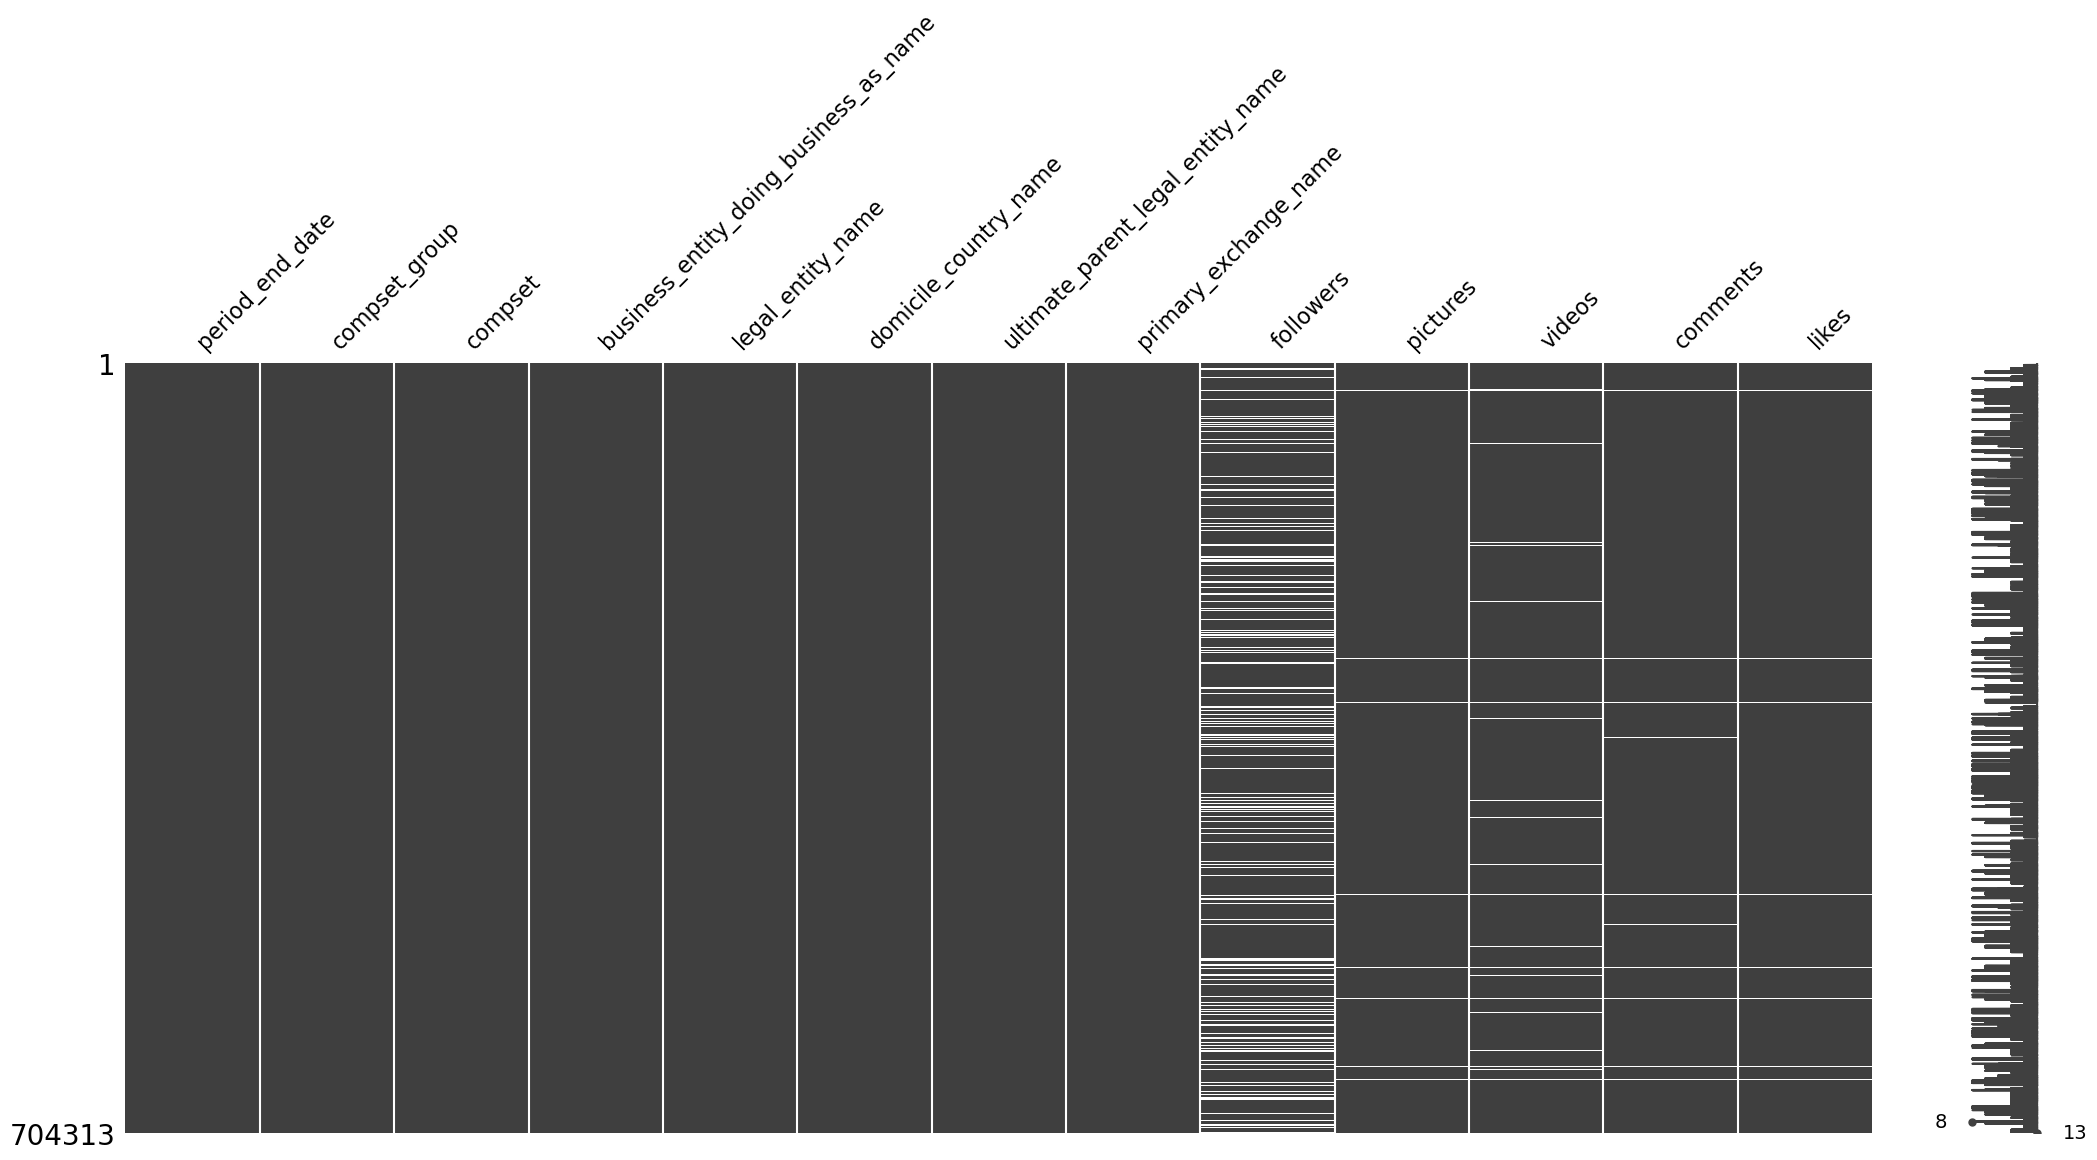

In [42]:
msno.matrix(df)